In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [6]:
file_index= np.arange(1,9)
print(file_index)
data_files = []
for i in file_index:
    data_files.append(pd.read_csv('clean_subject'+str(i)+'.csv'))
print(data_files)

[1 2 3 4 5 6 7 8]
[       Unnamed: 0  Time:512Hz  Epoch  Electrode  Event Id
0            7680   15.000000    240       -5.0       0.0
1            7681   15.001953    240       36.0       0.0
2            7682   15.003906    240       67.0       0.0
3            7683   15.005859    240       52.0       0.0
4            7684   15.007812    240        8.0       0.0
5            7685   15.009766    240        9.0       0.0
6            7686   15.011719    240       18.0       0.0
7            7687   15.013672    240       83.0       0.0
8            7688   15.015625    240      144.0       0.0
9            7689   15.017578    240      107.0       0.0
10           7690   15.019531    240       71.0       0.0
11           7691   15.021484    240       81.0   33552.0
12           7692   15.023438    240       55.0       0.0
13           7693   15.025391    240       34.0       0.0
14           7694   15.027344    240       54.0       0.0
15           7695   15.029297    240       70.0      

(82944,)
(61952,)
(108640,)
(113952,)
(502112,)
(127776,)
(116768,)
(151552,)


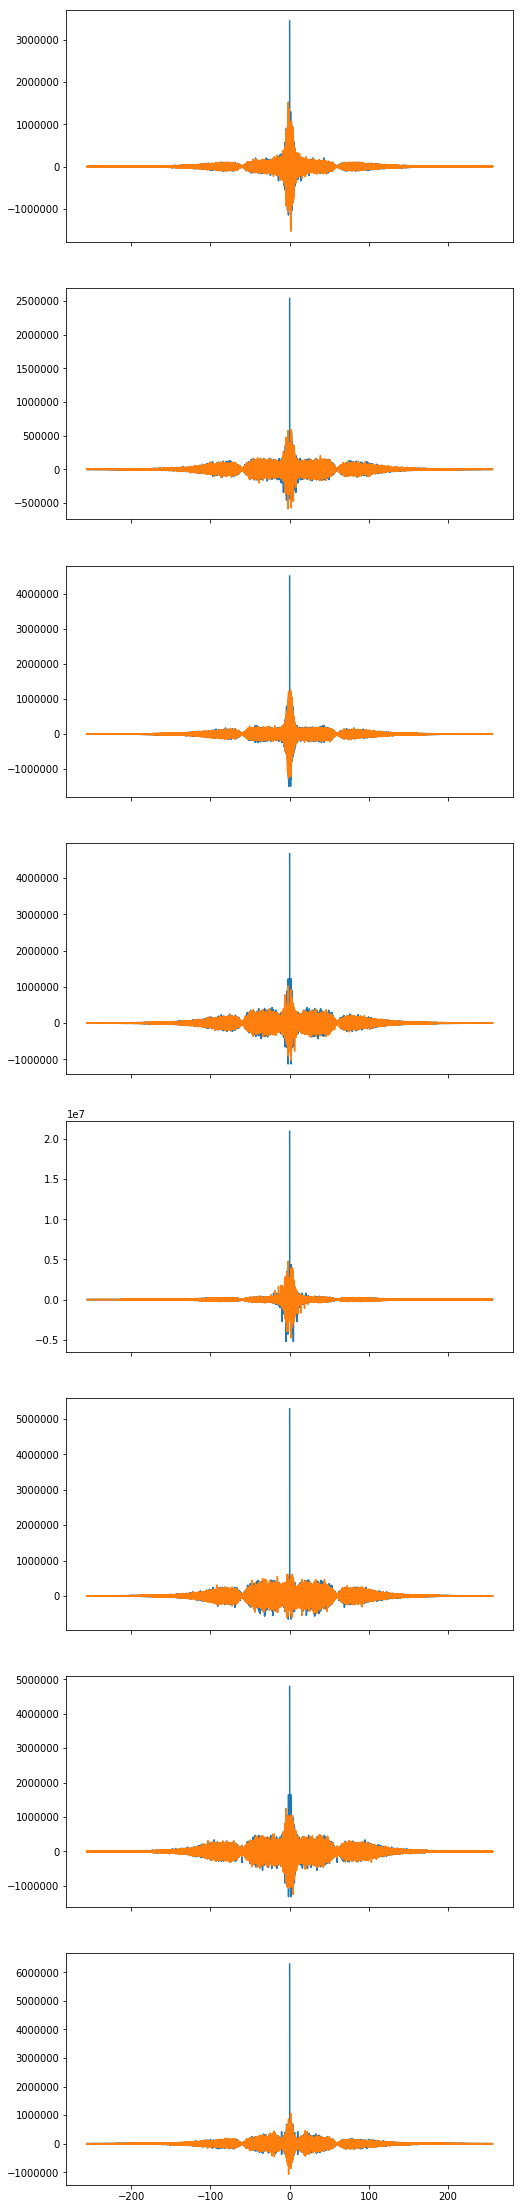

In [18]:
fft_data = []
fft_freq = []
for ind in file_index:
    fft_data.append(np.fft.fft(data_files[ind-1]['Electrode']))
    print(data_files[ind-1]['Electrode'].shape)
    fft_freq.append(np.fft.fftfreq(data_files[ind-1]['Electrode'].shape[0], 1/512))
f, axes = plt.subplots(8,1, sharex=True, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], fft_data[ind-1].real, fft_freq[ind-1], fft_data[ind-1].imag)
plt.show()


In [62]:
f, axes = plt.subplots(8,1, figsize=(8,40))
Fs = 512
Ts = 1.0 / Fs
for ind in file_index:
    n = len(data_files[ind]['Time:512Hz'])
    print(n)
    k = np.arange(n)
    T = n / Fs
    frq = k/T
    freq = frq[range(n //2)]
    y = fft_data[ind-1] / n
    print(len(y))
    Y = y[range(n // 2)]
    print(len(Y))
    axes[ind-1].plot(frq, np.abs(fft_data[ind-1]))
    axes[ind-1].set_xlim(-60,60)
    #axes[ind-1].set_ylim(-5,1000000000000)
plt.show()

61952


ValueError: x and y must have same first dimension, but have shapes (61952,) and (82944,)

In [ ]:
f, axes = plt.subplots(8,1, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])/sum())
    axes[ind-1].set_xlim(-60,60)
    axes[ind-1].set_ylim(-5,1000000000000)
plt.show()

In [60]:
plt.close('all')

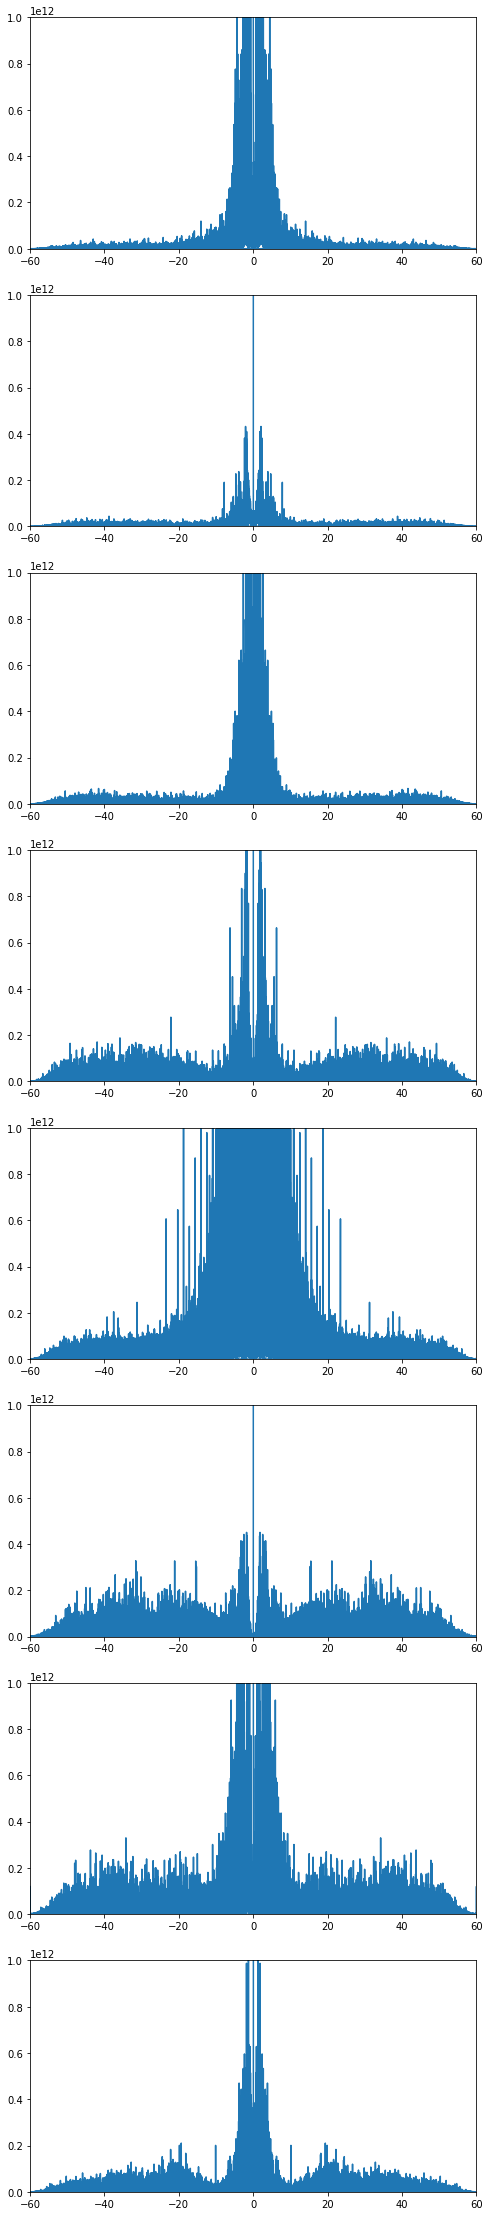

In [32]:
f, axes = plt.subplots(8,1, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])**2)
    axes[ind-1].set_xlim(-60,60)
    axes[ind-1].set_ylim(-5,1000000000000)
plt.show()

In [22]:
print(fft_freq[0])
print(fft_freq[0].shape)

[ 0.          0.00617284  0.01234568 ..., -0.01851852 -0.01234568
 -0.00617284]
(82944,)


In [64]:
tot_times = []
for ind in (range(len(file_index))):
    tmp_series = np.array(data_files[ind]['Time:512Hz'])
    tot_times.append( tmp_series[-1] - tmp_series[0])
    print( tmp_series[-1] - tmp_series[0])

161.998046875
120.998046875
212.185546875
222.560546875
980.685546875
249.560546875
228.060546875
295.998046875


In [68]:
sep_elec_data_dfs = []
for i in range(len(file_index)):
    tmp_ser = data_files[i]['Electrode']
    tmp_df = pd.DataFrame()
    for j in range(int(tot_times[i]//5)):
        tmp_df['Epoch'+str(j)] = tmp_ser[j*512:(j+1)*512*5]
    print(tmp_df.columns)
    sep_elec_data_dfs.append(tmp_df)
print(len(sep_elec_data_dfs))
        

Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23', 'Epoch24',
       'Epoch25', 'Epoch26', 'Epoch27', 'Epoch28', 'Epoch29', 'Epoch30',
       'Epoch31'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23', 'Epoch

In [75]:
#Waldo Data Epoching
wal_data_files = []
for i in file_index:
    wal_data_files.append(pd.read_csv('clean_waldo'+str(i)+'.csv'))
wal_data_files[0] = wal_data_files[0][:666] #Data issue for first ~700 datapoints
    
wal_tot_times = []
for ind in (range(len(file_index))):
    tmp_series = np.array(wal_data_files[ind]['Time:512Hz'])
    wal_tot_times.append( tmp_series[-1] - tmp_series[0])
    print( tmp_series[-1] - tmp_series[0])

wal_sep_elec_data_dfs = []
for i in range(len(file_index)):
    tmp_ser = wal_data_files[i]['Electrode']
    tmp_df = pd.DataFrame()
    for j in range(int(wal_tot_times[i]//5)):
        tmp_df['Epoch'+str(j)] = tmp_ser[j*512:(j+1)*512*5]
    print(tmp_df.columns)
    wal_sep_elec_data_dfs.append(tmp_df)
#print(len(Wal_sep_elec_data_dfs))

1.298828125
30.498046875
44.623046875
101.373046875
56.248046875
52.748046875
64.810546875
89.810546875
Index([], dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5'], dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10'

In [ ]:
#4-7Hz Theta
#0.1->4Hz Delta
#8-12 Alpha
#30-100Hz Gamma (artifact?)